![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 3
##### Isidre Munné-Bertran

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [1]:
# Library keepers
import pandas as pd
import numpy as np

# New ones for this LAB
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings. HURRAY !!!!

In [2]:
df = pd.read_csv('marketing_customer_analysis.csv')

### 1. Show DataFrame info.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In this dataset we have `9134` entries in `24` columns.

In [4]:
df.sample(5) # Let's get information from 5 random rows

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
5735,BK85520,Oregon,4996.564694,No,Basic,College,2/8/11,Employed,F,25915,Suburban,Single,64,13,62,0,7,Corporate Auto,Corporate L3,Offer1,Agent,317.979988,Two-Door Car,Medsize
5034,NI18835,California,2927.734329,No,Basic,Bachelor,2/15/11,Employed,M,51991,Rural,Married,73,4,95,0,1,Personal Auto,Personal L3,Offer2,Web,124.376921,Four-Door Car,Medsize
8183,AT84725,Washington,4650.063763,Yes,Basic,College,1/10/11,Retired,M,28215,Suburban,Single,65,15,26,0,3,Personal Auto,Personal L3,Offer1,Agent,468.000000,Two-Door Car,Medsize
8341,HF72557,Washington,3226.790317,No,Extended,Bachelor,2/6/11,Medical Leave,M,19948,Suburban,Divorced,89,17,84,0,1,Personal Auto,Personal L2,Offer1,Branch,427.200000,Four-Door Car,Medsize
7500,OA59724,Washington,3479.260311,No,Extended,College,2/15/11,Employed,F,66711,Urban,Married,86,25,92,0,1,Corporate Auto,Corporate L2,Offer1,Call Center,366.381387,Two-Door Car,Small


### 2. Describe DataFrame.

In [5]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### EXTRA:  Cleaning the datasetcolumns (standarize the names)
As a good practice.

In [6]:
df.columns = cc = [column.lower().replace(' ', '_') for column in df]

In [7]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 3. Show a plot of the total number of responses.

<AxesSubplot:>

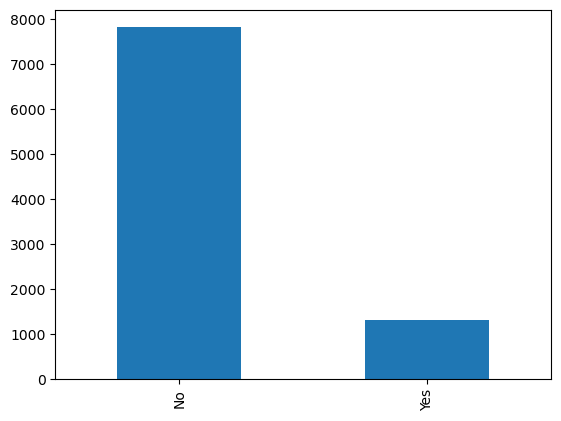

In [8]:
# We will count all unique Boolean values
df['response'].value_counts().plot(kind='bar') #Thanks to Cormac, I did not know what kind='bar' was

# This works for Boolean

### 4. Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

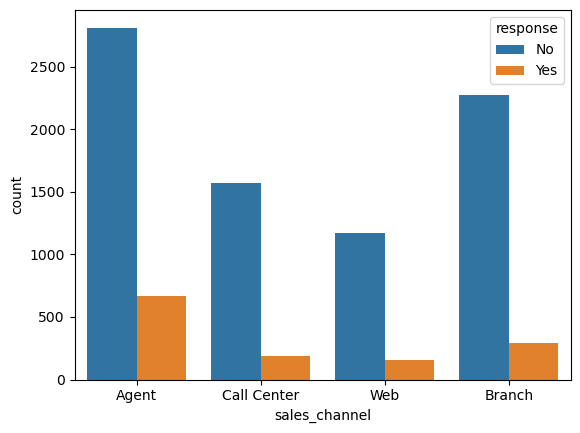

In [9]:
sns.countplot('sales_channel', hue='response', data=df)

### 5. Show a plot of the response rate by the total claim amount.

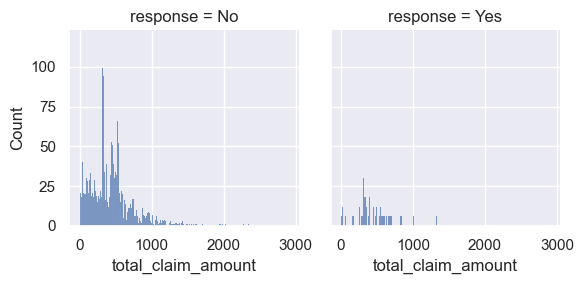

In [10]:
sns.set_theme(style="darkgrid")
sns.displot(
    df, x="total_claim_amount", col="response",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

### 6. Show a plot of the response rate by income.

<AxesSubplot:xlabel='response', ylabel='income'>

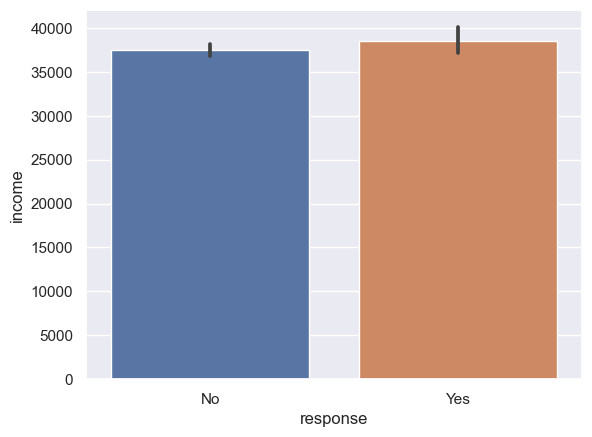

In [11]:
sns.barplot(x='response', y='income', data = df)

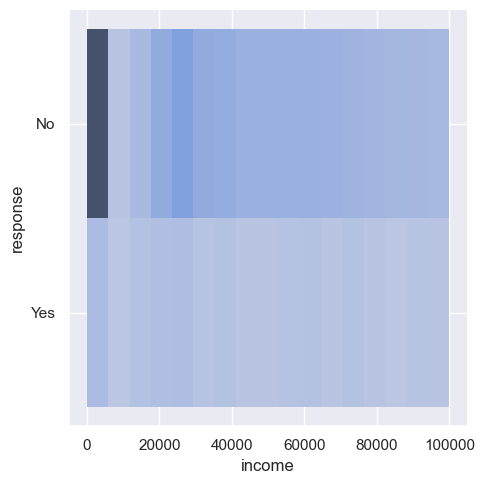

In [14]:
sns.displot(df, x="income", y="response")